In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal
from joblib import load
from sklearn.svm import SVC

# Ejercicio 1

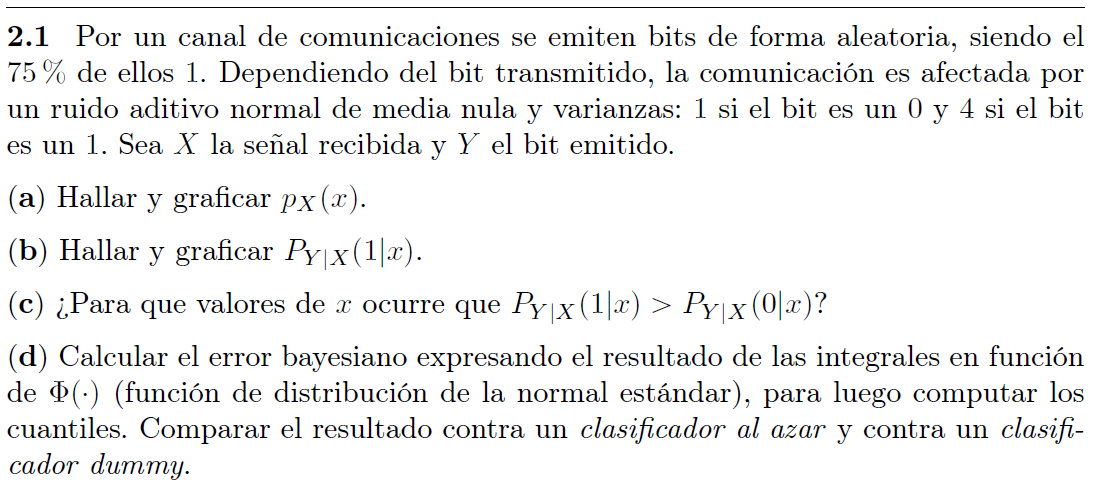

Item a)- Siendo $Y$ el bit transmitido $\in {0, 1}$ y $X$ la señal recibida, que depende de qué bit se transmitió y del ruido aditivo normal, se tiene que las distribuciones condicionales son:

$X|Y = 0 \sim N(0,1) \longrightarrow p_X(x|Y=0) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

$X|Y = 1 \sim N(0,4) \longrightarrow p_X(x|Y=1) = \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}$

Y sabiendo las probabilidades de $Y = 0$ e $Y = 1$ como $0.25$ y $0.75$ respectivamente, la distribución marginal de $x$ se obtiene como:

$p_X(x) = P(Y = 0)p_X(x|Y=0) + P(Y = 1)p_X(x|Y=1)$ 

$p_X(x) = 0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} + 0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}$

Item b)- Para hallar $P_{Y|X}(1|x)$ se aplica Bayes:

$P_{Y|X}(Y=1|x) = \frac{P(X = x|Y = 1) P(Y = 1)}{p_X(x)} = \frac{0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}}{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} + 0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}}$

Item c)- Al igual que en el ítem b se puede obtener $P_{Y|X}(Y=0|x)$ como

$P_{Y|X}(Y=0|x) = \frac{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} + 0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}}$

Entonces para hallar los valores de $x$ que se piden se plantea 

$$ \frac{0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}}{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} + 0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}} > \frac{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}{0.25\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} + 0.75\cdot \frac{1}{\sqrt{8\pi}}e^{-\frac{x^2}{8}}}$$

$$ \frac{3}{4}\cdot \frac{1}{2\cdot \sqrt{2\pi}}e^{-\frac{x^2}{8}} > \frac{1}{4}\cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

$$ \frac{3}{8}\cdot e^{-\frac{x^2}{8}} > \frac{1}{4}\cdot e^{-\frac{x^2}{2}}$$

$$ \frac{3}{2} > e^{-\frac{3}{8} x^2}$$

$$ -\frac{8}{3} \ln(\frac{3}{2}) > x^2$$

$$|x| < \sqrt{\frac{8\ln(1.5)}{3}} \approx 1.088$$

Item d)- El error bayesiano se define como el error mínimo posible al clasificar basado en la distribución a priori y la función de verosimilitud de los datos. Este error se calcula como la probabilidad de cometer un error al elegir la clase más probable. Es decir, el error bayesiano se obtiene al clasificar incorrectamente cuando se toma la decisión basándose en la probabilidad a posteriori máxima.

$$e_b = 1 - \mathbf{E}[\text{max}_yP_{Y|X}(y|X)]$$

Sabiendo del ítem anterior el $x = \alpha \approx 1.088$ para el cual cambia la región de decisión planteamos la integral:

$$e_b = 1 - [\int_{-\infty}^{-\alpha} P(Y = 0|X)\cdot P(X=x) dx + \int_{-\alpha}^{\alpha} P(Y = 1|X)\cdot P(X=x) dx + \int_{\alpha}^{+\infty} P(Y = 1|X)\cdot P(X=x) dx]$$

$$= 1 - [\int_{-\infty}^{-\alpha} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\cdot \frac{1}{4} dx + \int_{-\alpha}^{\alpha} \frac{1}{2\sqrt{2\pi}}e^{-\frac{x^2}{8}}\cdot \frac{3}{4} dx + \int_{\alpha}^{+\infty} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\cdot \frac{1}{4} dx]$$

C.A.)- $\Phi(z) = \int_{-\infty}^{z}\frac{1}{\sqrt(2\pi)} e^{-\frac{t^2}{2}dt}$ y usando software integral

Primer y tercer integral)- $\frac{1}{4}(1 - \Phi(\alpha))$

Segunda integral)- $\frac{3}{4}\cdot 2[\Phi(\frac{\alpha}{2\sqrt{2}}) - \frac{1}{2}]$

Sumando los tres términos:

$$e_b = \frac{5}{4} - \frac{3}{2}\Phi(\frac{\alpha}{2\sqrt{2}}) - \frac{1}{2}\Phi(\alpha)$$


Clasificador al azar asigna igual probabilidad a las $K = 2$ clases por lo que el error va a ser = 0.5
Clasificador dummy se queda con la clase de mayor probabilidad $Y = 1$ que tiene $P = 0.75$ por lo que el error va a ser = 0.25

# REVISAR EL DDDDDDDDDDDDDDDDDDDDD

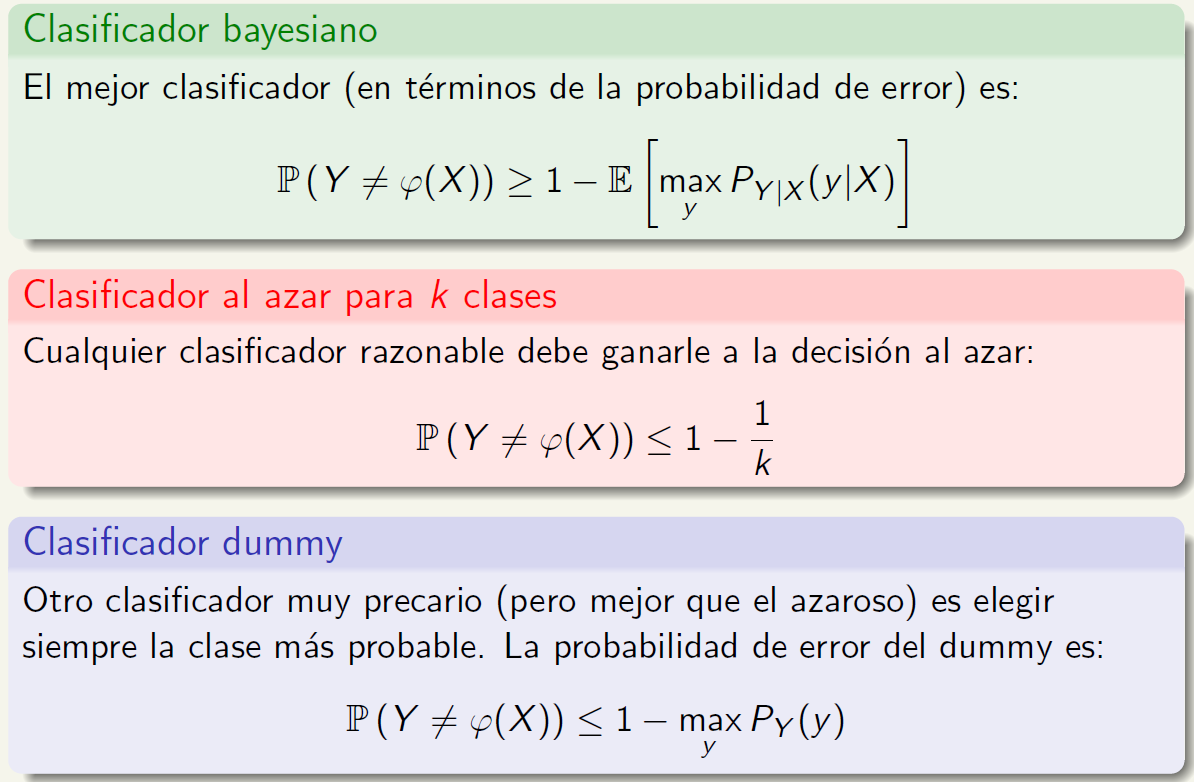

-------------------------- Item A --------------------------


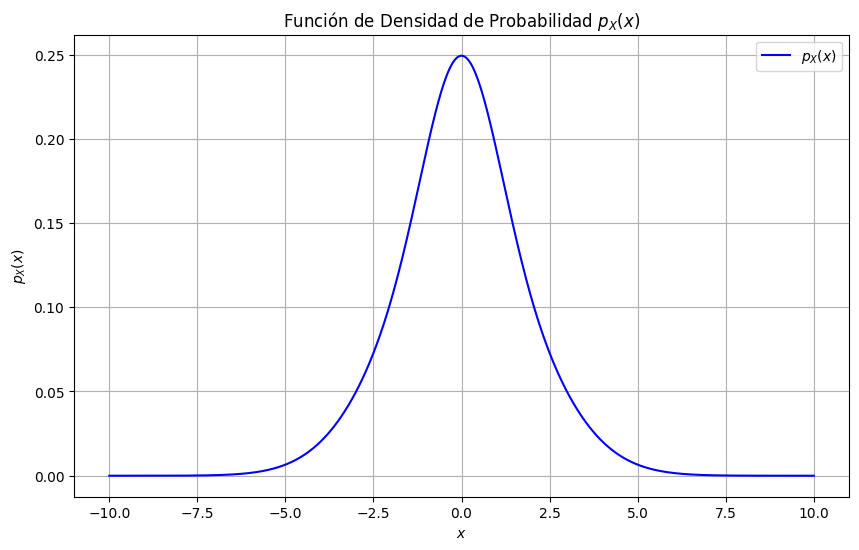

-------------------------- Item B --------------------------


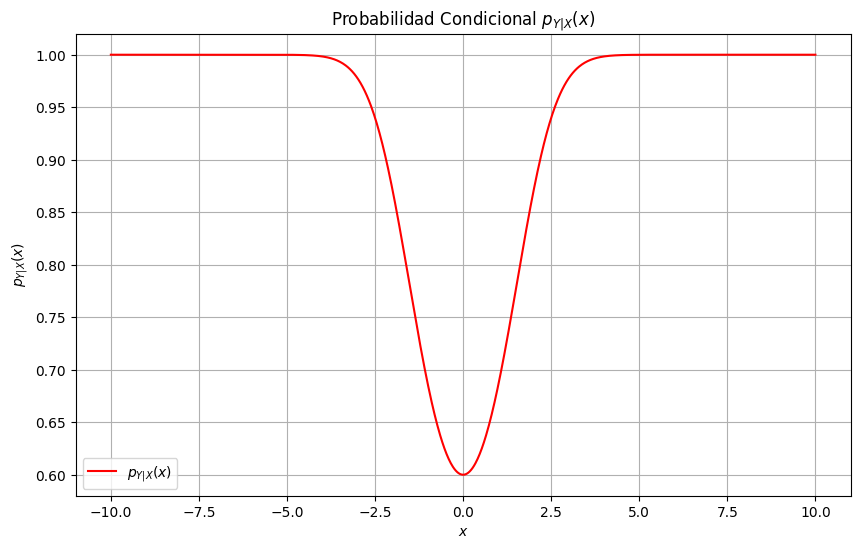

-------------------------- Item D --------------------------
Error de Bayes: 0.6206823277522798


In [22]:
# Parámetros
p1 = 0.75
p0 = 0.25
var1 = 4
var0 = 1
mu1 = 0
mu0 = 0
alpha = 1.088

def pdf0(x):
    return p0 * (1 / np.sqrt(2 * np.pi * var0)) * np.exp(-0.5 * (x - mu0)**2 / var0)

def pdf1(x):
    return p1 * (1 / np.sqrt(2 * np.pi * var1)) * np.exp(-0.5 * (x - mu1)**2 / var1)


def px(x):
    return pdf1(x) + pdf0(x)

def py_dado_x(x):
    return (pdf1(x)) / px(x)

# Definir el rango de valores para x
x = np.linspace(-10, 10, 1000)

# -------------------------- Item A --------------------------
print("-------------------------- Item A --------------------------")
# Calcular p_X(x)
px_values = px(x)

# Graficar p_X(x)
plt.figure(figsize=(10, 6))
plt.plot(x, px_values, label=r'$p_X(x)$', color='blue')
plt.title('Función de Densidad de Probabilidad $p_X(x)$')
plt.xlabel('$x$')
plt.ylabel('$p_X(x)$')
plt.legend()
plt.grid(True)
plt.show()


# -------------------------- Item B --------------------------
print("-------------------------- Item B --------------------------")
py_dado_x_values = py_dado_x(x)

# Graficar p_Y|X(x)
plt.figure(figsize=(10, 6))
plt.plot(x, py_dado_x_values, label=r'$p_{Y|X}(x)$', color='red')
plt.title('Probabilidad Condicional $p_{Y|X}(x)$')
plt.xlabel('$x$')
plt.ylabel('$p_{Y|X}(x)$')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------- Item D --------------------------
print("-------------------------- Item D --------------------------")
e_bayes = 1 - quad(pdf0, -np.inf, -alpha)[0] - quad(pdf1, -alpha, alpha)[0] - quad(pdf0, alpha, np.inf)[0]
print(f"Error de Bayes: {e_bayes}")



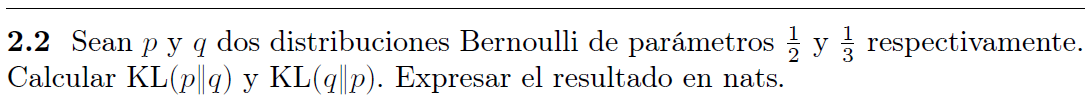

Las divergencias de Kullback-Leibler es una medida utilizada en teoría de la información para cuantificar la diferencia entre dos distribuciones de probabilidad. Se usa comúnmente en estadística, aprendizaje automático y teoría de la información para comparar una distribución "real" o de referencia con una distribución aproximada o de modelo.

KL = divergencias de Kullback-Leibler. $KL(p_X||q_X) = \mathbb{E}_{p_X}[\log(\frac{p_X(X)}{q_X(X)})]$

$$KL(p_X||q_X) = \sum_{x\in X}P(x)\log(\frac{P(x)}{Q(x)})$$

Desarrollando para este caso de Bernoulli

$$KL(p_X||q_X) = P(0)\log(\frac{P(0)}{Q(0)}) + P(1)\log(\frac{P(1)}{Q(1)})$$

Reemplazo por las probabilidades

$$KL(q_X||p_X) = \frac{1}{2}\log(\frac{\frac{1}{2}}{\frac{1}{3}}) + \frac{1}{2}\log(\frac{\frac{1}{2}}{\frac{2}{3}}) = \frac{1}{2}\log(\frac{3}{2}\cdot\frac{3}{4}) \approx 0.0589 nats$$

Analogamente:

$$KL(q_X||p_X) = \frac{1}{3}\log(\frac{\frac{1}{3}}{\frac{1}{2}}) + \frac{2}{3}\log(\frac{\frac{2}{3}}{\frac{1}{2}}) \approx 0.0566 nats$$

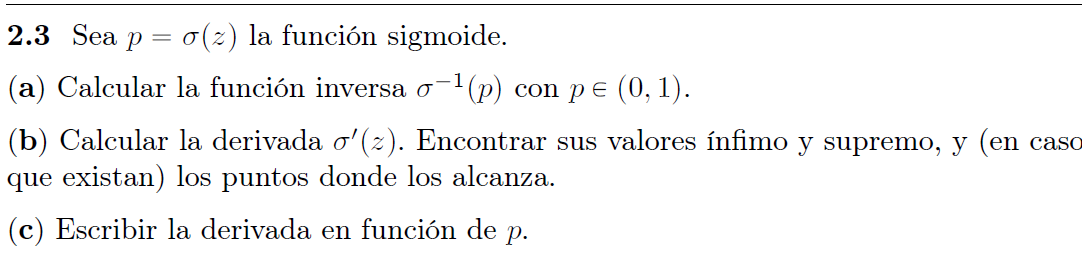

Item a)- La función sigmoide se define como

$p = \sigma(z) = \frac{1}{1+e^{-z}}$

de la cual se puede realizar el despeje y hallar la inversa como

$p\cdot (1 + e^{-z}) = 1$

$e^{-z} = \frac{1-p}{p}$

$z = -\ln (\frac{1}{p} - 1)$

$z = -\ln (\frac{1-p}{p}) = \ln(p) - \ln(1-p)$

Item b)- Ahora buscamos la derivada como:

$\sigma^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}$

para hallar valor ínfimo y supremo de esta, se debe derivar nuevamente e igualar a cero. Utilizando un software se obtiene que el valor supremo es para $z = 0$ y vale 0.25, y luego la función tiende a 0 para valores $z = \pm \infty$

Item c)- Si queremos escribir la derivada en función de $p$

$\sigma^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \cdot (1 - \frac{1}{1+e^{-z}}) = \frac{1}{1+e^{-z}} \cdot (\frac{1+e^{-z}-1}{1+e^{-z}}) = p\cdot (1-p)$

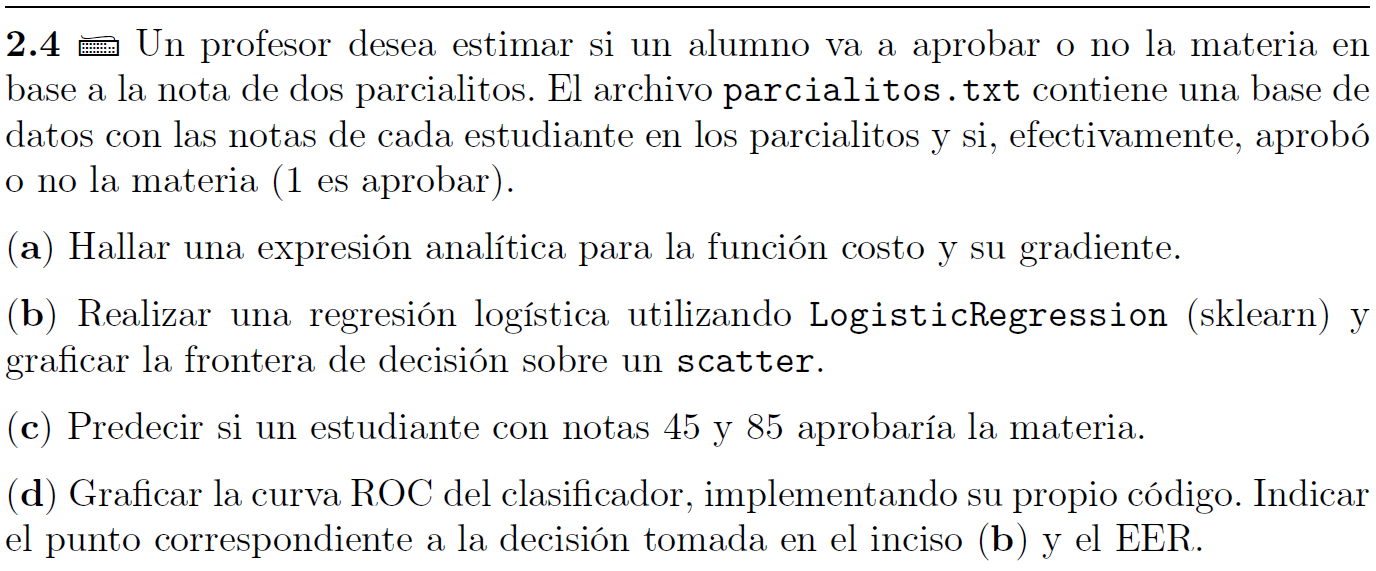

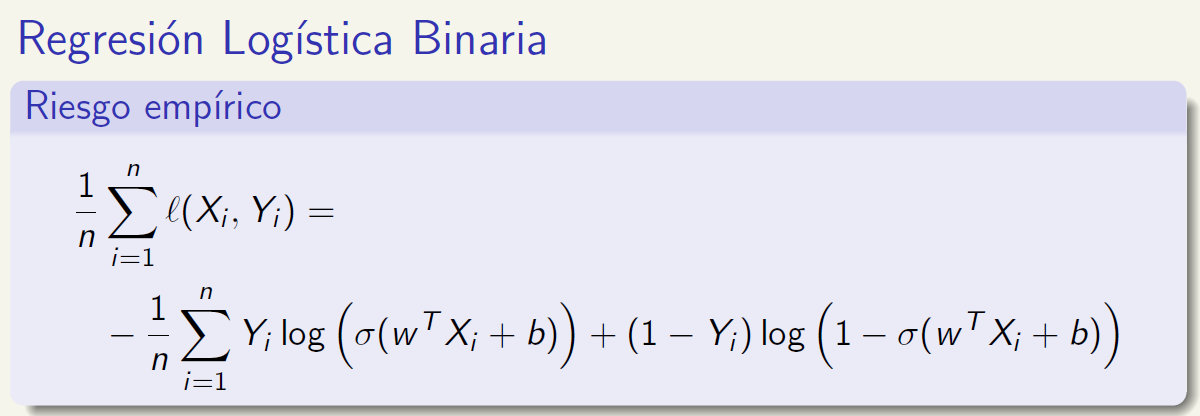

# Item a

# Función Costo

Siendo 

- $Y$ el valor real (0 o 1) de la salida

- $X$ el vector de características

- $w$ el vector de pesos

- $b$ el sesgo

- $\sigma(z)$ la función sigmoide

La función costo o riesgo empírico está dada por

$l(X, Y) = -[Y \log(\sigma(w^T X + b)) + (1- Y) \log(1 -\sigma(w^T X + b))]$  

$l(X, Y) = -Y \log(\sigma(w^T X + b)) - (1- Y) \log(1 -\sigma(w^T X + b))$

# Gradiente

En base a esto calculo el gradiente:

$\nabla l(X, Y) = -Y\cdot \frac{\partial \log(\sigma(w^T X + b))}{\partial w} - (1-Y)\cdot \frac{\partial \log(1 -\sigma(w^T X + b))}{\partial w}$

$\nabla l(X, Y) = - Y \cdot \frac{1}{\sigma(w^T X + b)} \cdot \frac{\partial \sigma(w^T X + b)}{\partial w} - (1 - Y) \cdot \frac{1}{(1 - \sigma(w^T X + b))} \cdot \frac{\partial (1 - \sigma(w^T X + b))}{\partial w}$

Y siendo $\sigma^\prime(x) = \sigma(x)\cdot (1 - \sigma(x))$, con $\nabla(w^T X) = X$ se puede desarrollar:

$$\nabla l(X, Y) = -X \cdot Y \cdot \frac{\sigma(w^T X + b)\cdot (1 - \sigma(w^T X + b))}{\sigma(w^T X + b)} + X\cdot (1 - Y) \cdot \frac{\sigma(w^T X + b)\cdot (1 - \sigma(w^T X + b))}{(1 - \sigma(w^T X + b))}$$

$$\nabla l(X, Y) = -X \cdot [Y \cdot (1 - \sigma(w^T X + b)) - (1 - Y) \cdot \sigma(w^T X + b)]$$

$$\nabla l(X, Y) = -X \cdot [Y - \sigma(w^T X + b)]$$


El alumno con notas 45 y 85 aprobó


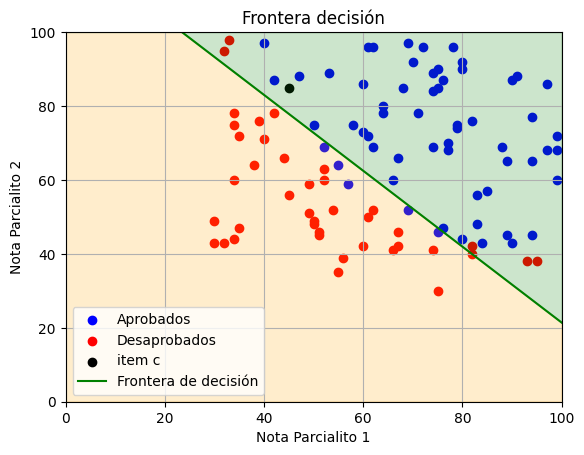

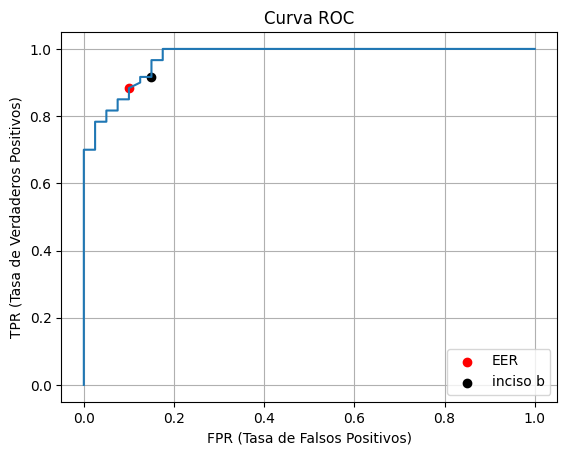

In [7]:
print("-------------------------- Item B --------------------------")
# Cargar los datos desde el archivo 'parcialitos.txt'
# data: matriz con tres columnas, donde las dos primeras son las notas de los estudiantes
# y la tercera columna es 1 si el estudiante aprobó o 0 si no aprobó.
data = np.loadtxt('data/parcialitos.txt')

# Separar las notas y los resultados de aprobación
notas = data[:, :2]  # Dos primeras columnas (notas de los parcialitos)
aprobados = data[:, 2]  # Última columna (si aprobó o no)

# Crear el modelo de regresión logística
regresion = LogisticRegression(penalty=None)

# Entrenar el modelo con los datos de las notas y los resultados de aprobación
regresion.fit(notas, aprobados)

# Calcular la pendiente 'm' y la intersección 'b' de la frontera de decisión
m = -regresion.coef_[0, 0] / regresion.coef_[0, 1]  # Pendiente de la recta de decisión
b = -regresion.intercept_ / regresion.coef_[0, 1]   # Intersección con el eje y

# Generar valores de x (notas del primer parcialito) para graficar la frontera de decisión
x_values = np.linspace(0, 100, 1000)

# Calcular los valores correspondientes de y (notas del segundo parcialito) usando la ecuación de la recta
y_values = m * x_values + b

# Separar los índices de los estudiantes que aprobaron y los que no aprobaron
indice_aprobados = np.where(aprobados == 1)  # Índices de los que aprobaron
indice_desaprobados = np.where(aprobados == 0)  # Índices de los que no aprobaron

# Crear una nueva figura para graficar
plt.figure()

# Graficar los estudiantes que aprobaron (azul) y los que no (rojo)
plt.scatter(notas[indice_aprobados, 0], notas[indice_aprobados, 1], color='blue', label='Aprobados')
plt.scatter(notas[indice_desaprobados, 0], notas[indice_desaprobados, 1], color='red', label='Desaprobados')

# Agregar un punto especial (45, 85) que corresponde a un estudiante específico
plt.scatter(45, 85, color='black', label='item c')

# Graficar la frontera de decisión (recta verde)
plt.plot(x_values, y_values, color='green', label='Frontera de decisión')

# Rellenar las regiones por encima y por debajo de la frontera de decisión
plt.fill_between(x_values, y_values, 100, color='green', alpha=0.2)  # Región de aprobados
plt.fill_between(x_values, y_values, 0, color='orange', alpha=0.2)   # Región de desaprobados

# Añadir título y etiquetas a los ejes
plt.title('Frontera decisión')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Nota Parcialito 1')
plt.ylabel('Nota Parcialito 2')
plt.legend()
plt.grid(True)

# -------------------------- Item C --------------------------
# Predecir si un estudiante con notas 45 y 85 aprobaría o no
aprobo = regresion.predict([[45, 85]])
# Imprimir si aprobó o desaprobó
print(f"El alumno con notas 45 y 85 {'aprobó' if aprobo[0] == 1 else 'desaprobó'}")

# -------------------------- Item D --------------------------
# Implementación de la curva ROC (Receiver Operating Characteristic)
# La curva ROC muestra la Tasa de Verdaderos Positivos (TPR) en función de la Tasa de Falsos Positivos (FPR)

# Inicialización de listas para almacenar FPR y TPR
FPR = []
TPR = []

# Iterar sobre umbrales de decisión entre 0 y 1 con pasos de 0.01
for umbral in np.arange(0, 1.01, 0.01):
    # Generar predicciones basadas en el umbral (1 si la probabilidad es mayor que el umbral)
    # Predict_proba devuelve la probabilidad de que la clase sea 0 o 1
    prediccion = np.where(regresion.predict_proba(notas)[:, 1] > umbral, 1, 0)
    
    # Calcular Verdaderos Positivos (TP) y Falsos Positivos (FP)
    TP = np.sum((prediccion == 1) & (aprobados == 1))
    FP = np.sum((prediccion == 1) & (aprobados == 0))

    # Calcular FPR y TPR
    FPR.append(FP / np.sum(aprobados == 0))  # FPR = FP / Total de negativos
    TPR.append(TP / np.sum(aprobados == 1))  # TPR = TP / Total de positivos

# Calcular el Equal Error Rate (EER)
# El EER es el punto donde FPR y la tasa de falsos negativos (FNR = 1 - TPR) son iguales
EER = np.abs(np.array(TPR) + np.array(FPR) - 1).argmin()  # Encontrar el índice donde TPR + FPR es más cercano a 1

# Indice para umbral = 0.5
umbral_05 = np.abs(np.array(np.arange(0, 1.01, 0.01)) - 0.5).argmin()

# Graficar la curva ROC
plt.figure()
plt.plot(FPR, TPR)
# Marcar el punto de EER en la gráfica (en rojo)
plt.scatter(FPR[EER], TPR[EER], color='red', label='EER')
plt.scatter(FPR[umbral_05], TPR[umbral_05], color='black', label='inciso b')
plt.title('Curva ROC')
plt.xlabel('FPR (Tasa de Falsos Positivos)')
plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
plt.legend()
plt.grid(True)


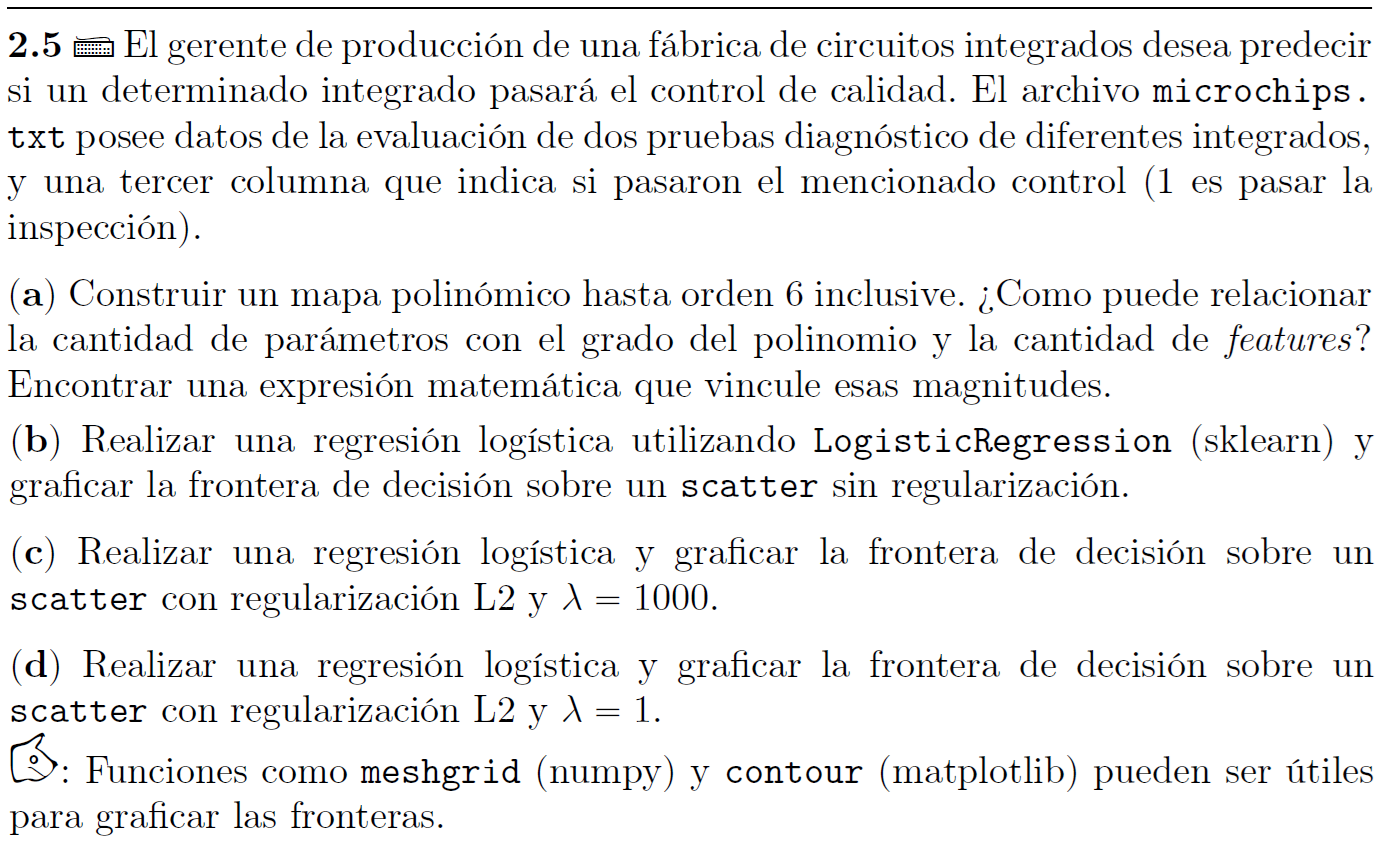

# Item A

Hay 2 variables de entrada, $x_1, x_2$, un $\textbf{mapa polinómico}$ hasta el orden $d$ genera todas las combinaciones de estas dos variables hata ese grado $d$.

Ejemplo para $d = 2$ se incluirían términos como:

- $x_1^2$

- $x_2^2$

- $x_1 x_2$

- $x_1$

- $x_2$

- el término constante o bias

Para cualquier grado $d$, las combinaciones de $x_1$ y $x_2$ pueden describirse como todos los productos posbiles de las formas $x_1^i x_2^j$, con $i + j \leq d$

El número total de términos para un polinomio de grado $d$ con $n$ variables está dado por la fórmula combinatoria

$$N = \binom{n + d}{d}$$

Siendo

- $N$ el número total de términos

- $n$ la cantidad de features originales (en este caso $n = 2$, siendo $x_1, x_2$)

- $d$ el grado del polinomio

-------------------------- Item B --------------------------


C:\Users\facun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------------------------- Item C --------------------------
-------------------------- Item D --------------------------


C:\Users\facun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


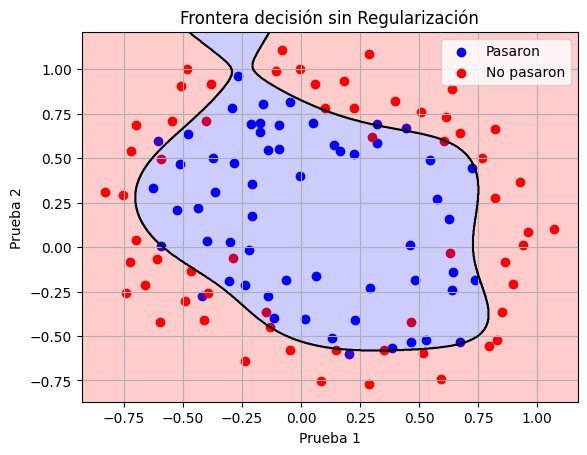

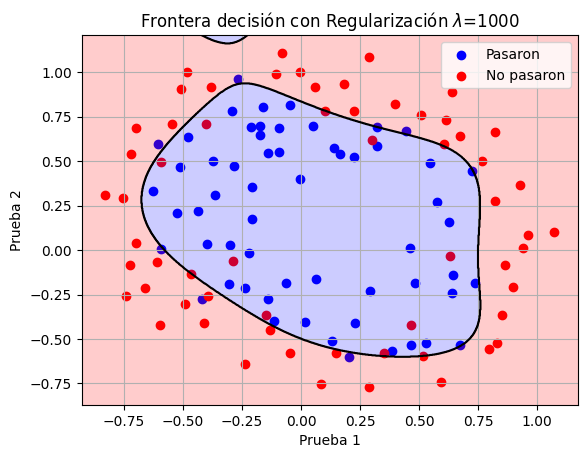

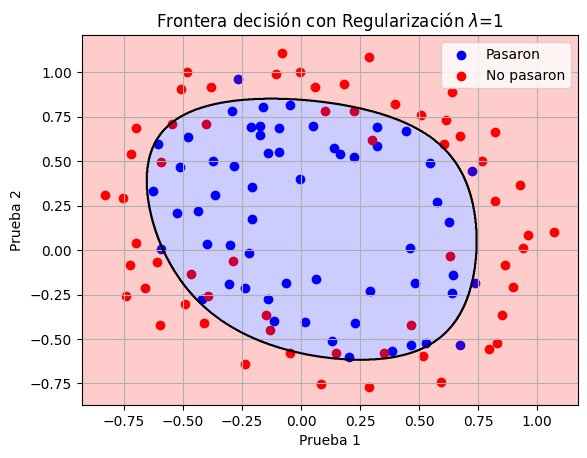

In [28]:
print("-------------------------- Item B --------------------------")
# Cargar los datos desde el archivo 'microchips.txt'
# Primeras dos columnas son las pruebas y la tercera es si pasó la inspección
data = np.loadtxt('data/microchips.txt', delimiter=',')

# Separar las pruebas y los resultados de la inspección
pruebas = data[:, :2]  # Dos primeras columnas pruebas
inspeccion = data[:, 2]  # Última columna (si pasó la inspección o no)

polynomial_features = PolynomialFeatures(degree=6, include_bias=False) # Include_bias=False para que no se incluya el término independiente
X_poly = polynomial_features.fit_transform(pruebas) # Transformar las pruebas originales en un conjunto de pruebas polinomiales

scaler = StandardScaler()  # Crear un objeto para estandarizar los datos
scaler.fit_transform(X_poly)

# Crear el modelo de regresión logística
regresion = LogisticRegression(penalty=None)
regresion.fit(X_poly, inspeccion)

# Para graficar los puntos que pasaron o no la inspección
indice_pasaron = np.where(inspeccion == 1)  # Índices de los que pasaron la inspección
indice_no_pasaron = np.where(inspeccion == 0)  # Índices de los que no pasaron la inspección

# Creo la meshgrid para graficar la frontera de decisión
# Defino límites mínimos y máximos para x e y
x_min, x_max = pruebas[:, 0].min() - 0.1, pruebas[:, 0].max() + 0.1
y_min, y_max = pruebas[:, 1].min() - 0.1, pruebas[:, 1].max() + 0.1

# Genero los puntos intermedios entre mínimos y máximos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Transformo los puntos de la meshgrid a un conjunto de pruebas polinomiales
X_poly_mesh = polynomial_features.transform(np.c_[xx.ravel(), yy.ravel()])

# Predigo si los puntos de la meshgrid pasaron o no la inspección
Z = regresion.predict(X_poly_mesh).reshape(xx.shape)

# Crear una nueva figura para graficar
plt.figure()
plt.scatter(pruebas[indice_pasaron, 0], pruebas[indice_pasaron, 1], color='blue', label='Pasaron')
plt.scatter(pruebas[indice_no_pasaron, 0], pruebas[indice_no_pasaron, 1], color='red', label='No pasaron')

plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['red', 'blue']))

plt.title('Frontera decisión sin Regularización')
plt.xlabel('Prueba 1')
plt.ylabel('Prueba 2')
plt.legend()
plt.grid(True)

print("-------------------------- Item C --------------------------")
regresion_regularizada_c = LogisticRegression(penalty='l2', C=1000)  # Regularización L2 con C=1
regresion_regularizada_c.fit(X_poly, inspeccion)

# Predigo si los puntos de la meshgrid pasaron o no la inspección con regularización
Z = regresion_regularizada_c.predict(X_poly_mesh).reshape(xx.shape)

# Crear una nueva figura para graficar la frontera de decisión con regularización
plt.figure()
plt.scatter(pruebas[indice_pasaron, 0], pruebas[indice_pasaron, 1], color='blue', label='Pasaron')
plt.scatter(pruebas[indice_no_pasaron, 0], pruebas[indice_no_pasaron, 1], color='red', label='No pasaron')

plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['red', 'blue']))

plt.title('Frontera decisión con Regularización $\lambda$=1000')
plt.xlabel('Prueba 1')
plt.ylabel('Prueba 2')
plt.legend()
plt.grid(True)

print("-------------------------- Item D --------------------------")
regresion_regularizada_d = LogisticRegression(penalty='l2', C=1)  # Regularización L2 con C=1
regresion_regularizada_d.fit(X_poly, inspeccion)

# Predigo si los puntos de la meshgrid pasaron o no la inspección con regularización
Z = regresion_regularizada_d.predict(X_poly_mesh).reshape(xx.shape)

# Crear una nueva figura para graficar la frontera de decisión con regularización
plt.figure()
plt.scatter(pruebas[indice_pasaron, 0], pruebas[indice_pasaron, 1], color='blue', label='Pasaron')
plt.scatter(pruebas[indice_no_pasaron, 0], pruebas[indice_no_pasaron, 1], color='red', label='No pasaron')

plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['red', 'blue']))

plt.title('Frontera decisión con Regularización $\lambda$=1')
plt.xlabel('Prueba 1')
plt.ylabel('Prueba 2')
plt.legend()
plt.grid(True)



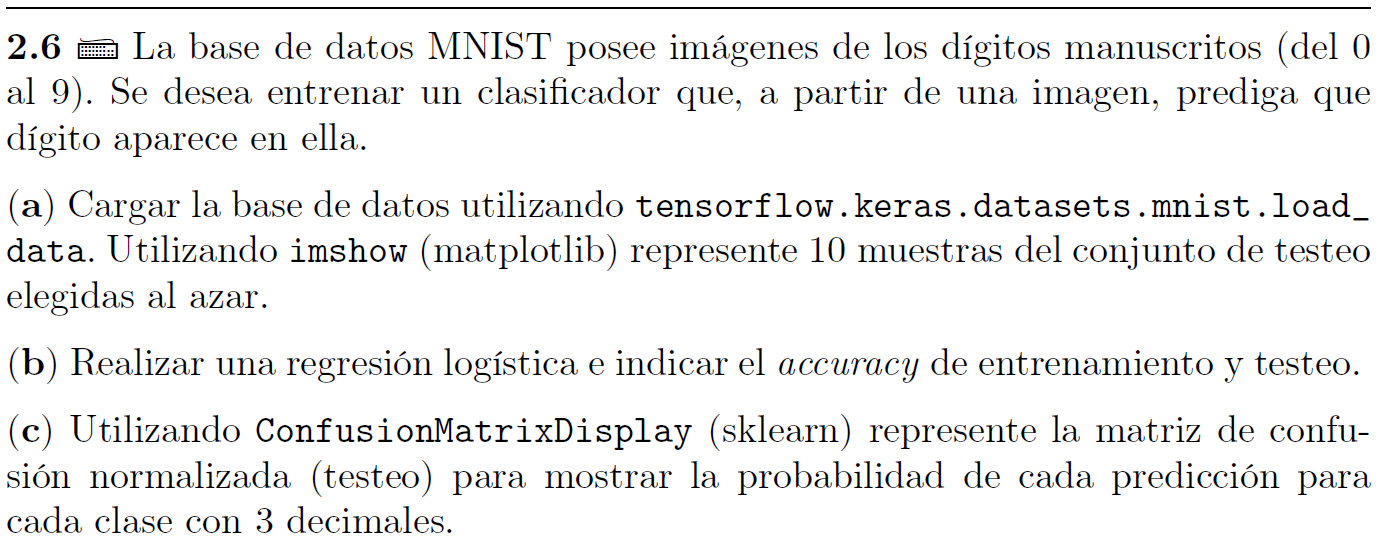

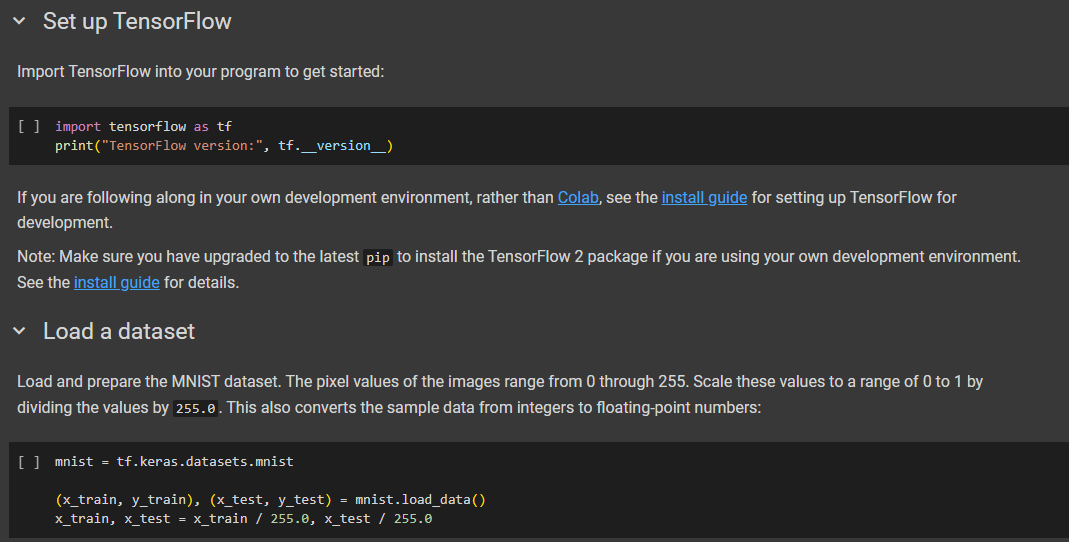

TensorFlow version: 2.17.0
-------------------------- Item A --------------------------


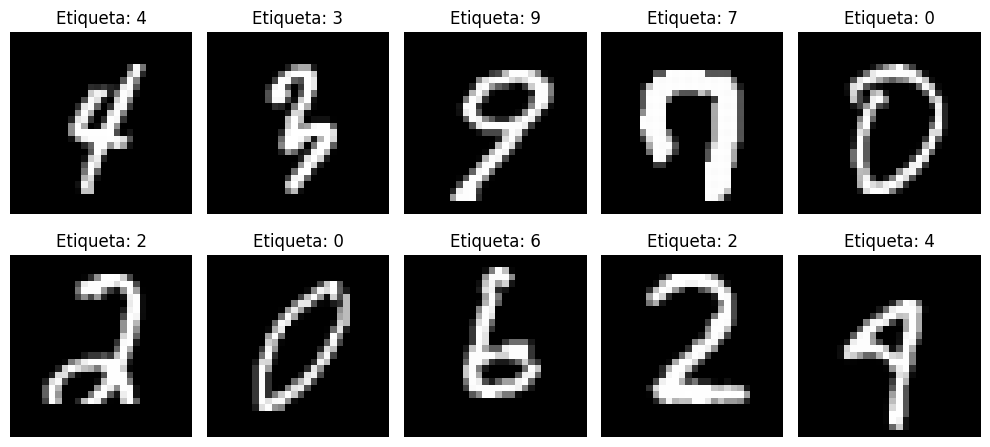

-------------------------- Item B --------------------------
(60000, 784)
(10000, 784)
Precisión en el conjunto de entrenamiento: 0.93860
Precisión en el conjunto de prueba: 0.92650
-------------------------- Item C --------------------------


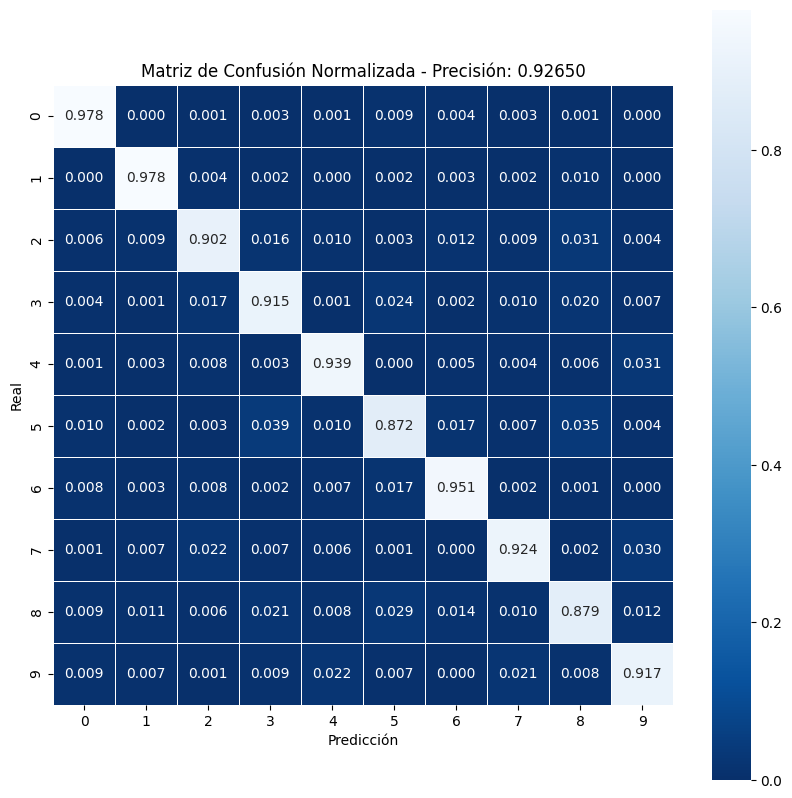

In [53]:
import tensorflow as tf
from sklearn import metrics
import seaborn as sns

print("TensorFlow version:", tf.__version__)

print("-------------------------- Item A --------------------------")
# x son las imágenes e y son las etiquetas
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar las imágenes para que vayan de 0 a 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Selecciono muestras al azar
indices = np.random.choice(x_train.shape[0], 10, replace=False)

# Creo una figura con 10 subgráficos
plt.figure(figsize=(10, 5))
for i, indice in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[indice], cmap='gray')
    plt.title(f'Etiqueta: {y_train[indice]}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

print("-------------------------- Item B --------------------------")
# Paso las imagenes a vector de pixeles
x_train_vector = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test_vector = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])

print(x_train_vector.shape)
print(x_test_vector.shape)

# Creo el modelo de regresión logística
regresion = LogisticRegression(max_iter=1000)
regresion.fit(x_train_vector, y_train)

# Calculo la precisión del modelo
precision_train = regresion.score(x_train_vector, y_train)
precision_test = regresion.score(x_test_vector, y_test)

print(f'Precisión en el conjunto de entrenamiento: {precision_train:.5f}')
print(f'Precisión en el conjunto de prueba: {precision_test:.5f}')

# Matriz de confusión
print("-------------------------- Item C --------------------------")
y_predict = regresion.predict(x_test_vector)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict, normalize='true')

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square= True, cmap='Blues_r')
plt.title('Matriz de Confusión Normalizada - Precisión: {:.5f}'.format(precision_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()




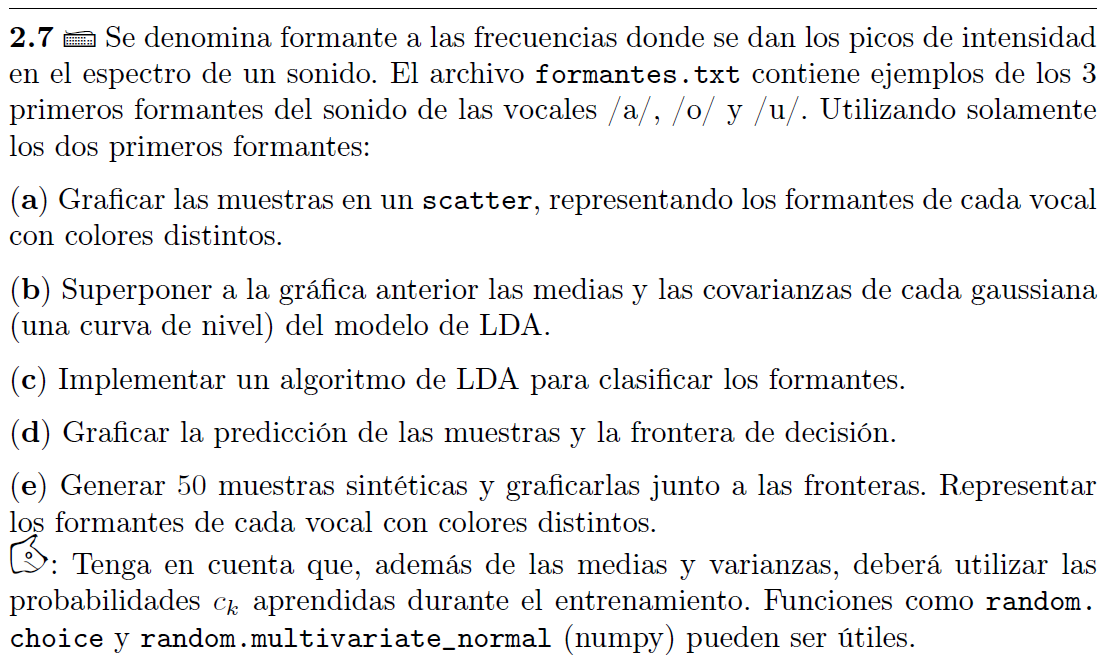

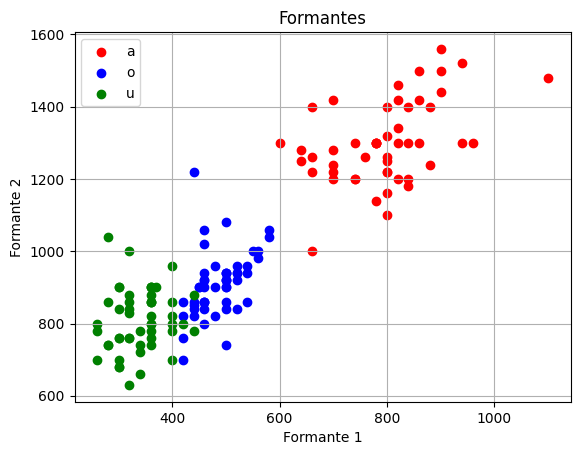

In [9]:
# LDA (Linear Discriminant Analysis o Análisis Discriminante Lineal) es un método estadístico utilizado 
# principalmente para clasificación y reducción de dimensionalidad.

# Asume que los datos son gaussianos: LDA supone que los datos de cada clase siguen una distribución normal 
# multivariante (Gaussiana) y que todas las clases tienen la misma matriz de covarianza, pero diferentes medias.

# Máxima separación entre clases: LDA trata de encontrar un conjunto de líneas o vectores (discriminantes lineales) 
# que maximicen la separación entre las medias de las diferentes clases, mientras minimiza la dispersión (varianza) 
# dentro de cada clase.

# Proyección a un espacio de menor dimensión: En el proceso de LDA, los datos se proyectan en un espacio de menor 
# dimensión (por ejemplo, en 1D o 2D), lo que hace que sea más fácil visualizar o clasificar los datos. El número 
# máximo de dimensiones en las que se pueden proyectar los datos es igual al número de clases menos 1.

data = pd.read_csv('data/formantes.txt', sep='\t', header = None)

# Viene dado por 3 columnas que son las frecuencias de las formantes y la cuarta dice si la vocal es /a/ /o/ /u/
# Me separo las formantes por vocal y me quedo con las primeras 2 para graficarlas en 2D

formantes_a = data.loc[data[3] == 'a'].drop(columns=[2, 3])
formantes_a = formantes_a.values

formantes_o = data.loc[data[3] == 'o'].drop(columns=[2, 3])
formantes_o = formantes_o.values

formantes_u = data.loc[data[3] == 'u'].drop(columns=[2, 3])
formantes_u = formantes_u.values

# Grafico con scatter
plt.figure()
plt.scatter(formantes_a[:, 0], formantes_a[:, 1], color='red', label='a')
plt.scatter(formantes_o[:, 0], formantes_o[:, 1], color='blue', label='o')
plt.scatter(formantes_u[:, 0], formantes_u[:, 1], color='green', label='u')
plt.title('Formantes')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid(True)
plt.show()


-------------------------- Item B --------------------------


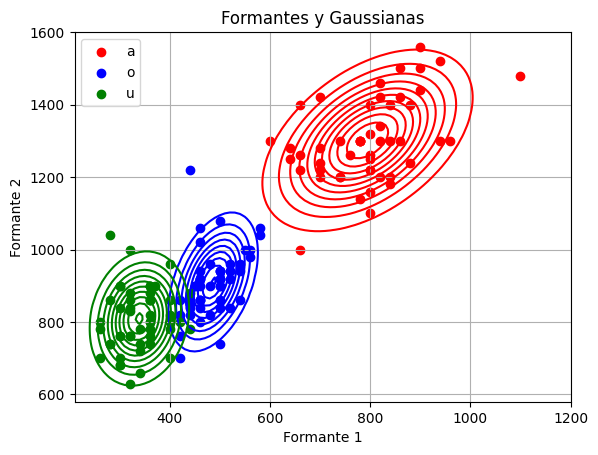

In [86]:
print("-------------------------- Item B --------------------------")

# Calcular las medias y covarianzas
mean_a = np.mean(formantes_a, axis=0)
var_a = np.cov(formantes_a, rowvar=False)

mean_o = np.mean(formantes_o, axis=0)
var_o = np.cov(formantes_o, rowvar=False)

mean_u = np.mean(formantes_u, axis=0)
var_u = np.cov(formantes_u, rowvar=False)

# Función para graficar las curvas de nivel gaussianas
def plot_gaussian_contour(mean, cov, color):
    # Puntos de grilla a evaluar la distribución gaussiana
    x, y = np.meshgrid(np.linspace(210, 1200, 100), np.linspace(580, 1600, 100))
    pos = np.dstack((x, y))
    
    # Crear la distribución gaussiana multivariante
    rv = multivariate_normal(mean, cov)
    
    # Graficar las curvas de nivel
    plt.contour(x, y, rv.pdf(pos), levels=10, colors=color)

# Graficar las muestras en un scatter
plt.figure()
plt.scatter(formantes_a[:, 0], formantes_a[:, 1], color='red', label='a')
plt.scatter(formantes_o[:, 0], formantes_o[:, 1], color='blue', label='o')
plt.scatter(formantes_u[:, 0], formantes_u[:, 1], color='green', label='u')

# Superponer las gaussianas
plot_gaussian_contour(mean_a, var_a, 'red')
plot_gaussian_contour(mean_o, var_o, 'blue')
plot_gaussian_contour(mean_u, var_u, 'green')

# Añadir etiquetas y leyenda
plt.title('Formantes y Gaussianas')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid(True)
plt.show()



-------------------------- Item C --------------------------
Precisión del modelo: 94.44%


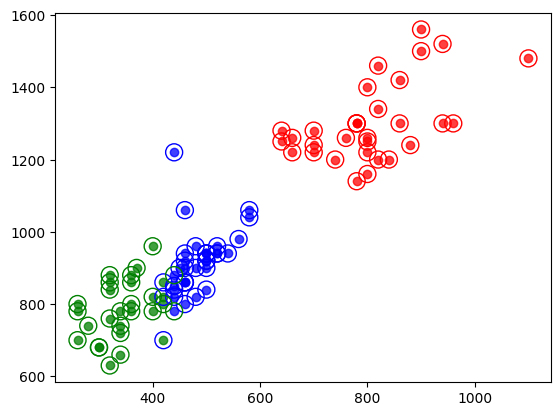

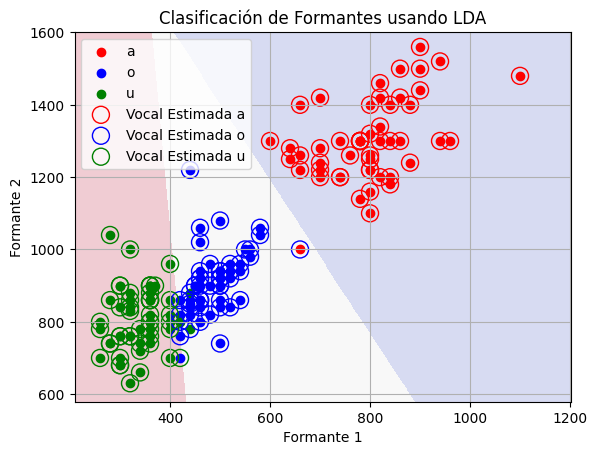

In [124]:
print("-------------------------- Item C --------------------------")
# Separar las características (formantes) y las etiquetas (vocales)
X = data.iloc[:, [0, 1]].values  # Solo los primeros dos formantes
y = data.iloc[:, 3].values  # Vocales (/a/, /o/, /u/)

# Dividir los datos en conjunto de entrenamiento y prueba
# Si se vuelve a correr el conjunto es otro y cambia la precisión
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

# Inicializar y entrenar el modelo de LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lda.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Visualizar los resultados de la clasificación
plt.figure()
colors = {'a': 'red', 'o': 'blue', 'u': 'green'}

# Graficar los puntos de prueba con la predicción de LDA
for label in np.unique(y_test):
    plt.scatter(X_test[y_pred == label, 0], X_test[y_pred == label, 1],
                color=colors[label], label=f'Vocal Estimada {label}', alpha=0.75)

# Graficar los puntos originales con la clase verdadera
for label in np.unique(y_test):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1],
                edgecolor=colors[label], facecolor='none', s=150, label=f'Vocal Real {label}')

# Otro método con fronteras
# Combina los formantes de todas las vocales en un solo conjunto de entrenamiento
formantes_train = np.vstack((formantes_a, formantes_o, formantes_u))

plt.figure()
def clasificador_LDA(sigma, mean_a, var_a, mean_o, var_o, mean_u, var_u, grid_points):
    w_a = np.linalg.inv(sigma) @ mean_a.T
    w_o = np.linalg.inv(sigma) @ mean_o.T
    w_u = np.linalg.inv(sigma) @ mean_u.T
    
    b_a = -0.5 * mean_a.T @ np.linalg.inv(sigma) @ mean_a + np.log(1/3)
    b_o = -0.5 * mean_o.T @ np.linalg.inv(sigma) @ mean_o + np.log(1/3)
    b_u = -0.5 * mean_u.T @ np.linalg.inv(sigma) @ mean_u + np.log(1/3)
    
    length = grid_points.shape[0]
    y = np.zeros((length, 3))  # Guardo las 3 clasificaciones y después me quedo con la mayor
    
    for i in range(length):
        y[i, 0] = w_a[0] * grid_points[i, 0] + w_a[1] * grid_points[i, 1] + b_a
        y[i, 1] = w_o[0] * grid_points[i, 0] + w_o[1] * grid_points[i, 1] + b_o
        y[i, 2] = w_u[0] * grid_points[i, 0] + w_u[1] * grid_points[i, 1] + b_u
        
    return np.argmax(y, axis=1)

# Calculo de la matriz de covarianza
n = len(data)
n_a = len(formantes_a)
n_o = len(formantes_o)
n_u = len(formantes_u)

sigma = 1 / (n - 3) * ((n_a - 1) * var_a + (n_o - 1) * var_o + (n_u - 1) * var_u)

xx, yy = np.meshgrid(np.linspace(210, 1200, 500), np.linspace(580, 1600, 500))
# Aplanar las coordenadas del grid para pasarlas al clasificador
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predecir la clase para cada punto de la cuadrícula
Z = clasificador_LDA(sigma, mean_a, var_a, mean_o, var_o, mean_u, var_u, grid_points)

# Darle la forma correcta a Z para poder graficarlo
Z = Z.reshape(xx.shape)

# Graficar las fronteras de decisión
plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Graficar las muestras originales
plt.scatter(formantes_a[:, 0], formantes_a[:, 1], color='red', label='a')
plt.scatter(formantes_o[:, 0], formantes_o[:, 1], color='blue', label='o')
plt.scatter(formantes_u[:, 0], formantes_u[:, 1], color='green', label='u')

# Predicciones para los puntos de entrenamiento
predicciones = clasificador_LDA(sigma, mean_a, var_a, mean_o, var_o, mean_u, var_u, formantes_train)

clase_a = formantes_train[predicciones == 0]
clase_o = formantes_train[predicciones == 1]
clase_u = formantes_train[predicciones == 2]

# Graficar las predicciones
plt.scatter(clase_a[:, 0], clase_a[:, 1], edgecolor='red', facecolor='none', s=150, label=f'Vocal Estimada a')
plt.scatter(clase_o[:, 0], clase_o[:, 1], edgecolor='blue', facecolor='none', s=150, label=f'Vocal Estimada o')
plt.scatter(clase_u[:, 0], clase_u[:, 1], edgecolor='green', facecolor='none', s=150, label=f'Vocal Estimada u')

plt.title('Clasificación de Formantes usando LDA')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid(True)
plt.show()


-------------------------- Item E --------------------------


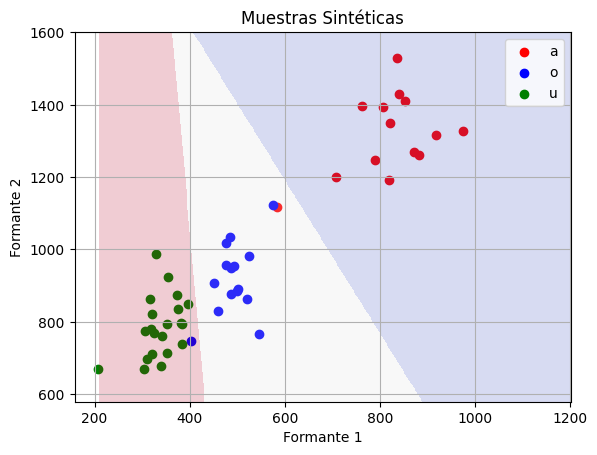

In [146]:
print("-------------------------- Item E --------------------------")
# Probabilidades
probabilidades = {'a': n_a / n, 'o': n_o / n, 'u': n_u / n}
muestras_sinteticas = np.zeros([50, 2])  # Solo almacenamos las coordenadas
vocales = []  # Lista para almacenar las vocales

for i in range(50):
    rand = random.choices(list(probabilidades.keys()), list(probabilidades.values()))[0]
    
    # Identifico con letras a la vocal
    if rand == 'a':
        muestras_sinteticas[i, :2] = np.random.multivariate_normal(mean_a, var_a)
        vocales.append('a')
    elif rand == 'o':
        muestras_sinteticas[i, :2] = np.random.multivariate_normal(mean_o, var_o)
        vocales.append('o')
    else:
        muestras_sinteticas[i, :2] = np.random.multivariate_normal(mean_u, var_u)
        vocales.append('u')

# Graficar las muestras sintéticas
plt.figure()

# Separar los diferentes plots por la lista de vocales
for vocal, color in zip(['a', 'o', 'u'], ['red', 'blue', 'green']):
    plt.scatter(muestras_sinteticas[np.array(vocales) == vocal, 0], 
                muestras_sinteticas[np.array(vocales) == vocal, 1], 
                color=color, label=vocal)

# Graficar las fronteras de decisión (asumiendo que Z se ha calculado previamente)
plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title('Muestras Sintéticas')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid(True)
plt.show()

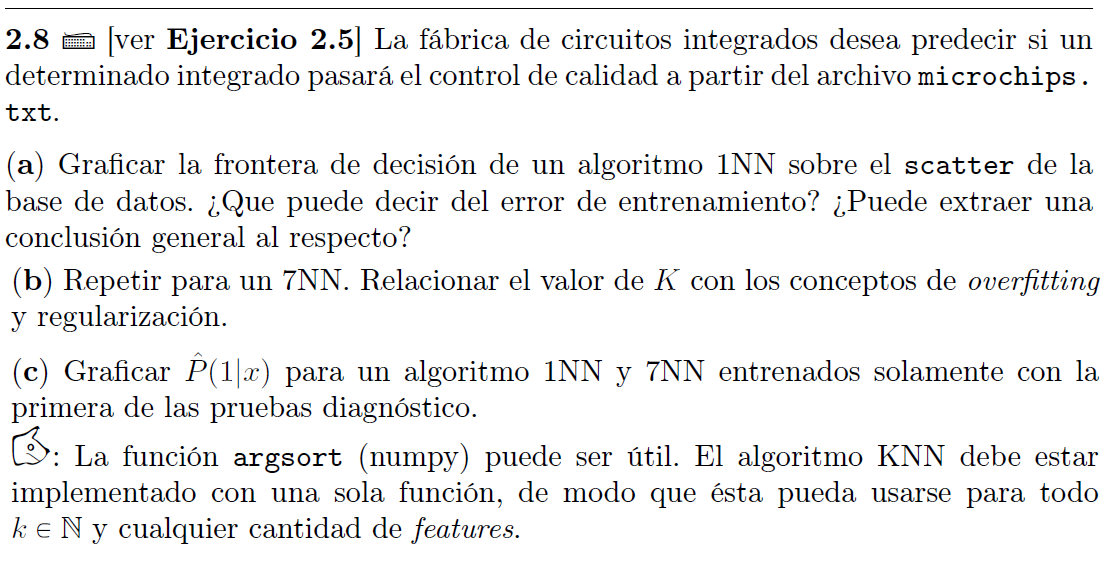

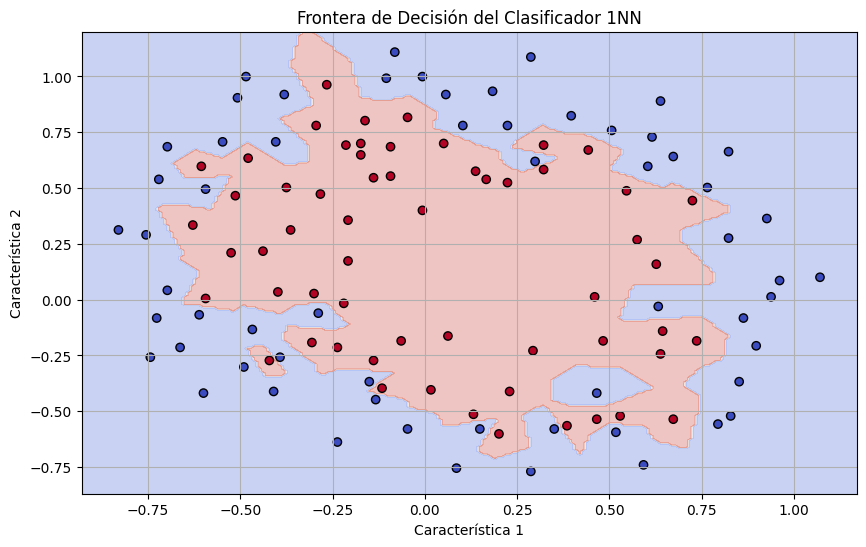

Exactitud de entrenamiento: 1.00


In [169]:
# Cargar los datos desde el archivo
data = pd.read_csv('data/microchips.txt', header=None)
X = data.iloc[:, :-1].values  # Características (columnas 0 y 1)
y = data.iloc[:, -1].values    # Etiquetas (columna 2)

def knn(X_train, y_train, X_test, k):
    # Calcular la distancia Euclidiana entre los puntos de entrenamiento y prueba
    distances = np.linalg.norm(X_train[:, np.newaxis] - X_test, axis=2)
    
    # Obtener los índices de los k vecinos más cercanos
    k_indices = np.argsort(distances, axis=0)[:k]

    # Obtener las etiquetas de los k vecinos más cercanos
    k_nearest_labels = y_train[k_indices]
        
    vecinos = np.zeros((k_nearest_labels.shape[1], 2))
    for i in range(k_nearest_labels.shape[1]):
        vecinos[i] = np.bincount(k_nearest_labels[:, i], minlength=2) / k
        #vecinos.append(np.bincount(k_nearest_labels[:, i])/k) 
    
    # Realizar votación para determinar la clase más común
    most_common = np.array([np.bincount(k_nearest_labels[:, i]).argmax() for i in range(k_nearest_labels.shape[1])])
        
    return most_common, vecinos

# Crear una cuadrícula para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Aplanar las coordenadas de la cuadrícula
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predecir las clases en la cuadrícula
Z, P_1 = knn(X, y, grid_points, k=1)
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o')
plt.title('Frontera de Decisión del Clasificador 1NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid()
plt.show()

# Evaluar el error de entrenamiento
Z, _= knn(X, y, X, k=1)
train_accuracy = np.mean(Z == y)
print(f'Exactitud de entrenamiento: {train_accuracy:.2f}')



-------------------------- Item B --------------------------


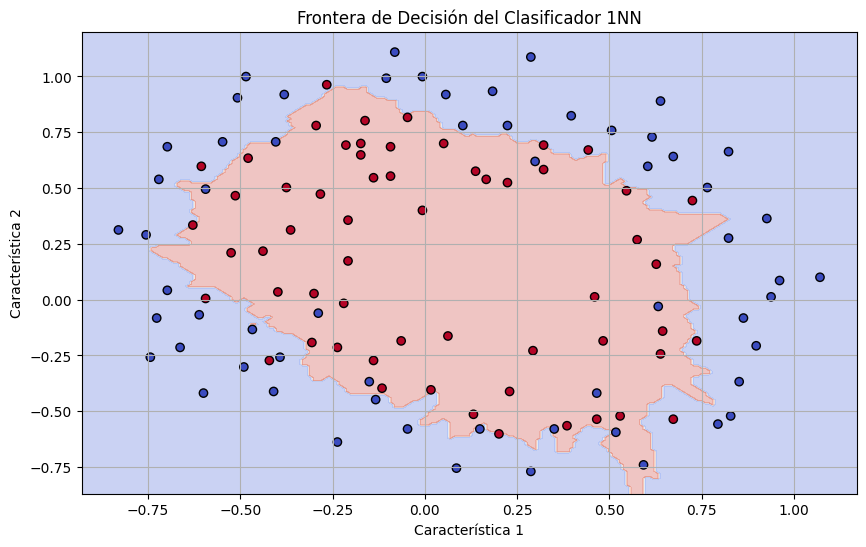

Exactitud de entrenamiento: 0.84


In [170]:
print("-------------------------- Item B --------------------------")
Z, P_7 = knn(X, y, grid_points, k=7)
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o')
plt.title('Frontera de Decisión del Clasificador 1NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid()
plt.show()

# Evaluar el error de entrenamiento
Z, _ = knn(X, y, X, k=7)
train_accuracy = np.mean(Z == y)
print(f'Exactitud de entrenamiento: {train_accuracy:.2f}')

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


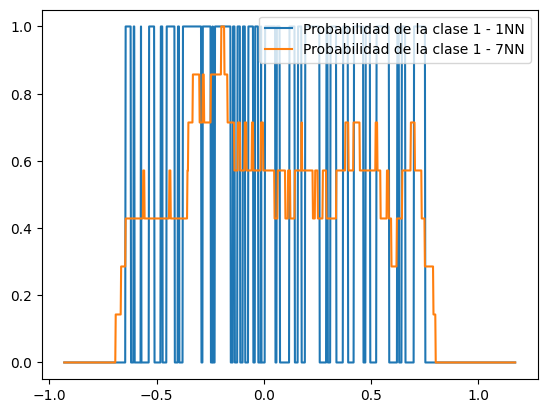

In [174]:
data_2 = data.drop(1, axis=1)
X = data_2.iloc[:, :-1].values  # Características (columnas 0 y 1)
y = data_2.iloc[:, -1].values    # Etiquetas (columna 2)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
eje_x = np.linspace(x_min, x_max, 1000)

Z, P_1 = knn(X, y, eje_x[:, np.newaxis], k=1)
Z, P_7 = knn(X, y, eje_x[:, np.newaxis], k=7)
# Graficar la probabilidad de la clase 1

print(P_7)
plt.figure()
plt.plot(eje_x, P_1[:, 1], label='Probabilidad de la clase 1 - 1NN')
plt.plot(eje_x, P_7[:, 1], label='Probabilidad de la clase 1 - 7NN')
plt.legend(loc = 'upper right')


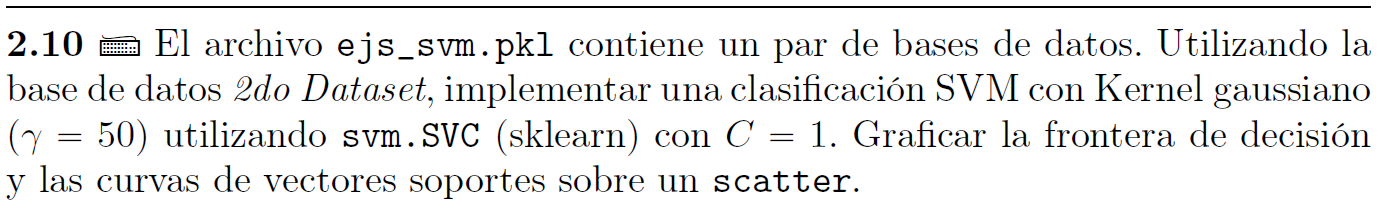

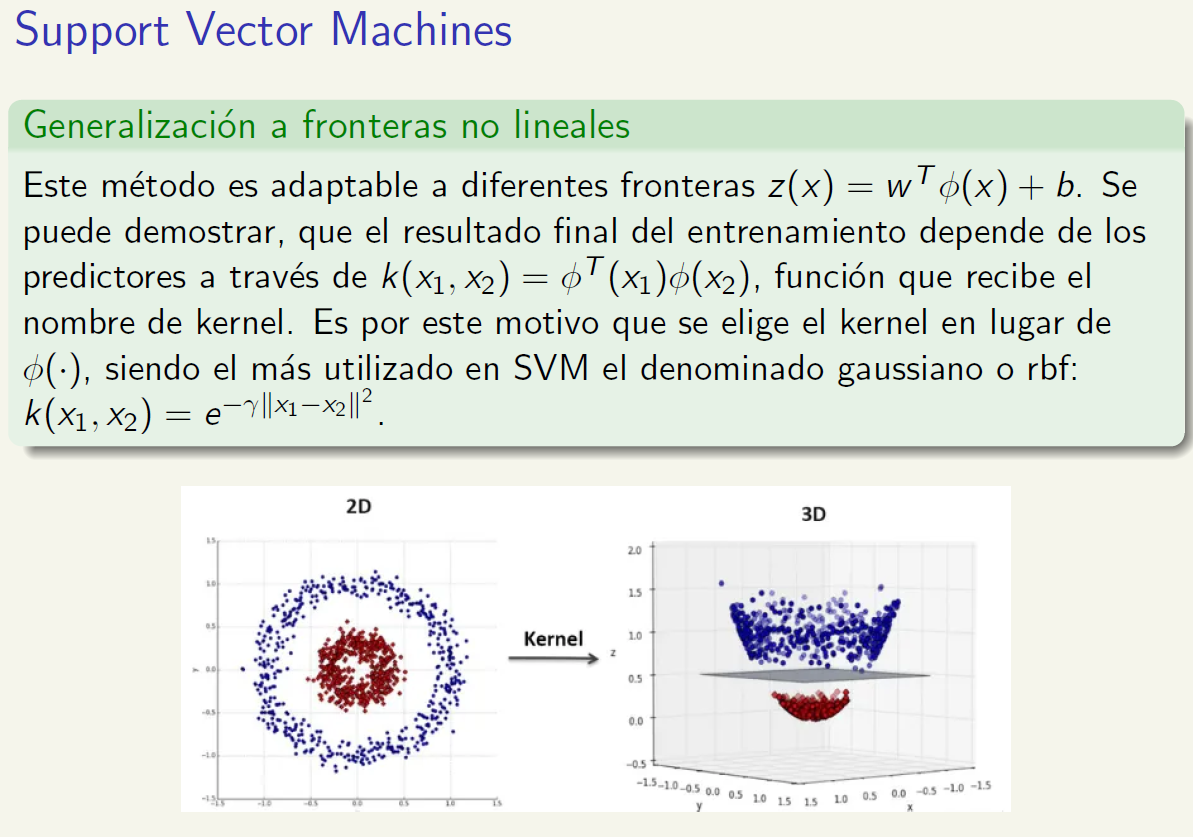

-------------------------- Item A --------------------------


C:\Users\facun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\facun\AppData\Local\Temp\ipykernel_24456\3201836064.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


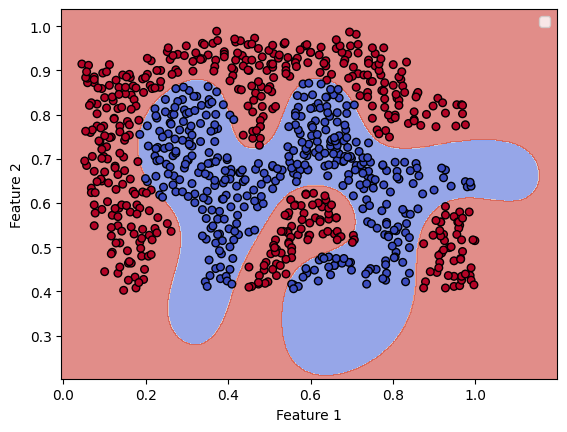

In [193]:
datos = load("data/ejs_svm.pkl")

print("-------------------------- Item A --------------------------")
dataset = datos['2do Dataset']
X = dataset['X']
y = dataset['y']

clf = SVC(kernel='rbf', C=1, gamma=50)  # gamma controla el ancho del kernel Gaussiano
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()